In [2]:
suppressPackageStartupMessages(require(tidyverse))
suppressPackageStartupMessages(require(data.table))
require(gridExtra)


In [3]:
pheno_name <- 'Calcium'

In [5]:
##############

prj_dir <- '@@@@@@/projects/biomarkers_rivas'
pvar_f <- '@@@@@@/ukbb24983/cal/pgen/ukb24983_cal_cALL_v2_hg19.pvar'

meta_sumstats_f  <- file.path(prj_dir, 'meta', paste0('METAANALYSIS_', pheno_name, '_1.tbl'))
meta_flipfixed_f <- file.path(prj_dir, 'meta_flipfixed', paste0('METAANALYSIS_', pheno_name, '_1.tbl.gz'))
gwas_f           <- file.path(prj_dir, 'main', 'w_british', paste0('ukb24983_v2_hg19.', pheno_name, '.genotyped.glm.linear.gz'))

meta_flipfixed_img <- file.path(prj_dir, 'meta_flipfixed', paste0('METAANALYSIS_', pheno_name, '_1.check.png'))


In [6]:

##############

add_flip_annotation <- function(df, pvar_df){

    pvar_df %>% 
    rename('MarkerName' = 'ID') %>%
    right_join(df, by='MarkerName') %>%
    mutate(
        A1_is_ref = (toupper(Allele1) == toupper(REF)),    
        A1_is_alt = (toupper(Allele1) == toupper(ALT)),
        A2_is_ref = (toupper(Allele2) == toupper(REF)),    
        A2_is_alt = (toupper(Allele2) == toupper(ALT)),
        is_not_flipped = (A1_is_alt & A2_is_ref),
        is_flipped     = (A1_is_ref & A2_is_alt)
    )
}

flip_check_plot <- function(df, gwas_df, titlelab, xlab){
    df %>% 
    rename('P' = 'P-value') %>%
    filter(P < 5e-8) %>%
    select(MarkerName, Effect, is_flipped) %>% 
    inner_join(gwas_df %>% select(ID, BETA) %>% rename('MarkerName' = 'ID'), by='MarkerName') %>%
    ggplot(aes(x=Effect, y=BETA, color=is_flipped)) +
    geom_point(alpha=0.05) + 
    labs(
        title = titlelab,
        x = xlab,
        y = 'BETA from WB GWAS sumstats'
    )+
    guides(colour = guide_legend(override.aes = list(alpha = 1)))    
}


In [7]:
##############

pvar_df <- fread(pvar_f) %>% rename('CHROM' = '#CHROM')

gwas_df <- fread(cmd=paste0('zcat ', gwas_f))

meta_sumstats_df  <- fread(meta_sumstats_f)
meta_flipfixed_df <- fread(cmd=paste0('zcat ', meta_flipfixed_f))


meta_sumstats_p <- meta_sumstats_df %>%
add_flip_annotation(pvar_df) %>%
flip_check_plot(
    gwas_df, 
    titlelab = paste0('Comparison of Effect size before flipfix (', pheno_name, ')'), 
    xlab = 'Effect col from meta-analysis'
)

meta_flipfixed_joined_p <- meta_flipfixed_df %>%
rename('Allele1' = 'ALT', 'Allele2' = 'REF') %>%
add_flip_annotation(pvar_df) %>%
flip_check_plot(
    gwas_df, 
    titlelab = paste0('Comparison of Effect size after flipfix (', pheno_name, ')'), 
    xlab = 'Effect col from the flip-fixed meta-analysis results'
)

Warning message:
“Removed 901 rows containing missing values (geom_point).”Warning message:
“Removed 901 rows containing missing values (geom_point).”

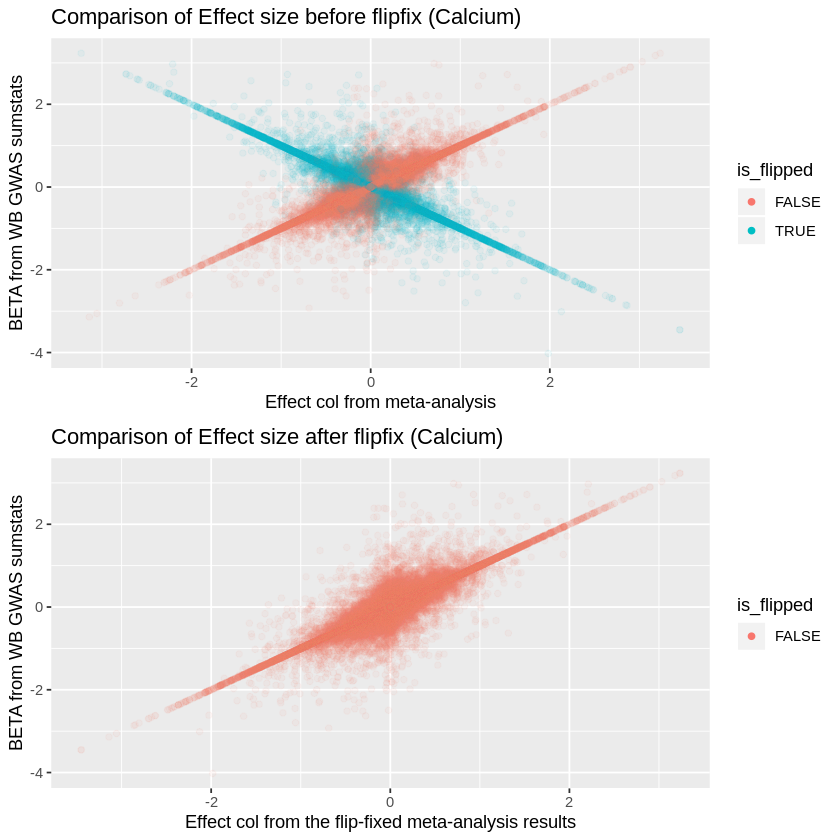

In [8]:
grid.arrange(meta_sumstats_p, meta_flipfixed_joined_p, nrow=1)

In [9]:
meta_flipfixed_img

[1] "@@@@@@/projects/biomarkers_rivas/meta_flipfixed/METAANALYSIS_Calcium_1.check.png"

In [10]:
png(meta_flipfixed_img, width = 12, height = 6)
grid.arrange(meta_sumstats_p, meta_flipfixed_joined_p, nrow=1)
dev.off()


Warning message:
“Removed 901 rows containing missing values (geom_point).”Warning message:
“Removed 901 rows containing missing values (geom_point).”

png 
  2

In [11]:
png(meta_flipfixed_img)
grid.arrange(meta_sumstats_p, meta_flipfixed_joined_p, nrow=1)
dev.off()


Warning message:
“Removed 901 rows containing missing values (geom_point).”Warning message:
“Removed 901 rows containing missing values (geom_point).”

png 
  2

In [12]:
g <- arrangeGrob(meta_sumstats_p, meta_flipfixed_joined_p, nrow=1)

Warning message:
“Removed 901 rows containing missing values (geom_point).”Warning message:
“Removed 901 rows containing missing values (geom_point).”

In [13]:
g

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

In [14]:
ggsave(file=meta_flipfixed_img, width=12, height=6, g)


Saving 6.67 x 6.67 in image


In [15]:
ggsave(file=meta_flipfixed_img, width=12, height=6, g)
